In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from pandas import DataFrame

HEIGHT = 5
WIDTH = 3
SIZE = 20

# customize the palette, check https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html for more
colormaps = cm.get_cmap(plt.get_cmap("tab20")).colors

### Simple Plot

There are multiple ways to draw a simple plot:
- use `pyplot` interface to draw it directly
- add a new subplot, draw it via `Axes` class, which contains most of the figure elements and sets the coordinate system
- create a new `Figure` class, which contains all the plot elements, then draw it via `Axes` class by adding a new subplot

Reference: https://stackoverflow.com/questions/37970424/what-is-the-difference-between-drawing-plots-using-plot-axes-or-figure-in-matpl

In [2]:
# creating the arrays for testing
x = np.arange(1, 100)
y = np.sqrt(x)

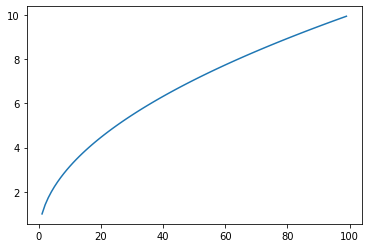

In [3]:
# via pyplot interface
plt.plot(x, y)
plt.show()

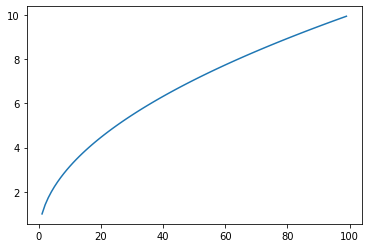

In [4]:
# via Axes class
ax = plt.subplot()
ax.plot(x, y)
plt.show()

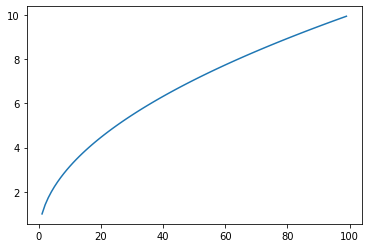

In [5]:
# via Figure class
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y)
plt.show()

In [6]:
raw = {
    "x": np.random.choice(10, 20),
    "y": np.random.randint(low=11, high=50, size=20),
    "group": np.random.choice(["a", "b", "c"], 20),
}
df_general = pd.DataFrame(raw)
df_general.sort_values(by=["group", "x"], inplace=True)
df_general

,x,y,group
4,1,24,a
2,2,16,a
15,3,49,a
1,6,42,a
10,7,36,a
12,8,22,a
14,8,37,a
3,9,35,a
18,2,41,b
0,3,19,b


### Scatter Plot

In [7]:
from matplotlib.axes import Axes


def render_scatter(ax: Axes, df: DataFrame) -> None:
    ax.scatter(data=df, x="x", y="y")

#     ax.set_xlim(3, 7)
#     ax.set_ylim(10, 40)

    ax.set_title("Scatter Plot")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    
    return

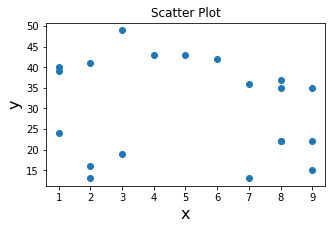

In [8]:
_, ax = plt.subplots(figsize=(HEIGHT, WIDTH))

render_scatter(ax, df_general)

plt.show()

### Box Plot

In [9]:
import numpy as np
from matplotlib.axes import Axes
from pandas import Series


def collect_group_array(df: DataFrame, groups: list) -> list:
    arrays = []

    for g in groups:
        array = df.loc[df["group"] == g, "x"]
        # position index is the same as that of the group
        arrays.append(array)
    
    return arrays

def jiggling(array: Series) -> Series:
    stdev = .03 * (max(array) - min(array) + 1)
    
    return array + np.random.randn(array.size) * stdev

def render_box(ax: Axes, df: DataFrame) -> None:
    groups = df["group"].unique()
    
    group_x = collect_group_array(df, groups)
    positions = [i for i in range(len(groups))]
    
    # each group would occupy a horizontal line at y-axis
    ax.boxplot(
        x=group_x,
        vert=False,
        whis=[0, 100],
        positions=positions,
        widths=.5
    )
    ax.set_yticklabels(groups)
    ax.tick_params(axis="y", labelsize=12)

    # map each group to its corrsponding y position, e.g, "b" -> 2
    group_to_pos = {}
    for g, p in zip(groups, positions):
        group_to_pos[g] = p
    # apply jiggling to get the new y value for scatter
    y_jiggle = jiggling(df["group"].map(group_to_pos))
    
    ax.scatter(
        x=df["x"],
        y=y_jiggle,
        s=10,
        color=".3",
        linewidth=1
    )
    
    ax.set_title("Box Chart")
    
    return

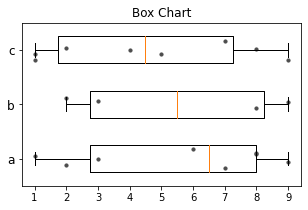

In [10]:
# box plot with distribution
_, ax = plt.subplots(figsize=(HEIGHT, WIDTH))

render_box(ax, df_general)

plt.show()

### Swimlane Plot / Gantt Chart

In [11]:
def construct_timing(df: DataFrame) -> DataFrame:
    # convert "start" and "end" columns into one "timing" column
    timing = []
    for col in ["start", "end"]:
        t = df_range[col].to_frame()
        t["type"] = col
        t.rename(columns={col: "timing"}, inplace=True)

        timing.append(t)

    df = pd.concat(timing)
    df.reset_index(level=0, inplace=True)
    df["index"] = df.astype(str)
    df.sort_values(by=["timing"])
    
    return df

def render_swimlane(ax: Axes, df: DataFrame) -> None:
    df_timing = construct_timing(df)
    
    for i in df_timing["index"].unique():
        ax.plot("timing", "index", data=df_timing.loc[df_timing["index"] == i])

    x_stick = 30
    style = {"size": 10, "color": "black", "alpha": 0.5}
    # draw a vertical line
    ax.axvline(x=x_stick, alpha=.5, color="black", linewidth=.3)
    ax.text(
        x=x_stick,
        y=df_timing.shape[0] / 2 - 1, # set the label at the top of the plot
        s=str("cross"),
        ha="center",
        rotation=45,
        **style,
    )

    ax.set_title("Swimlane Chart")
    ax.tick_params(axis="x", which="major", labelrotation=45)
    for l in ax.get_xticklabels():
        l.set_horizontalalignment("center")
    
    return

In [12]:
raw = {
    "x": range(0, 10),
    "start": np.random.randint(low=11, high=30, size=10),
}
df_range = pd.DataFrame(raw)
df_range["end"] = df_range["start"] + np.random.randint(low=3, high=20)
df_range.sort_values(by=["start", "x"], inplace=True)
df_range

,x,start,end
3,3,11,30
6,6,11,30
5,5,12,31
8,8,12,31
9,9,12,31
0,0,18,37
1,1,20,39
2,2,22,41
4,4,22,41
7,7,28,47


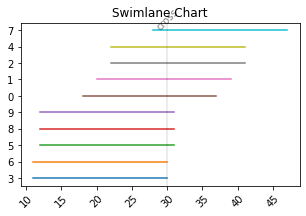

In [13]:
_, ax = plt.subplots(figsize=(HEIGHT, WIDTH))

render_swimlane(ax, df_range)

# # apply `pyplot` is even better for it enables alignment directly
# plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")
plt.show()

### Bar Plot

In [14]:
raw = {
    "division": np.random.choice(["d1", "d2", "d3"], SIZE, p=[.5, .3, .2]),
    "color": np.random.choice(["red", "yellow", "blue", np.nan], SIZE, p=[.3, .3, .3, .1]),
    "placeholder": np.random.choice([1], SIZE)
}
df_div = pd.DataFrame(raw)
df_div.sort_values(by=["division", "color"], inplace=True)
df_div

,division,color,placeholder
1,d1,blue,1
12,d1,blue,1
17,d1,blue,1
2,d1,nan,1
5,d1,red,1
6,d1,yellow,1
10,d1,yellow,1
13,d1,yellow,1
14,d1,yellow,1
16,d1,yellow,1


In [15]:
def construct_counter(df: DataFrame) -> DataFrame:
    # acquire counter for each group
    tmp_counter = df.groupby(["division", "color"], dropna=False).count()
    tmp_counter.reset_index(inplace=True)
    tmp_counter.rename(columns={"placeholder": "counter"}, inplace=True)
    
    # grasp all possible group combination
    divisions = df["division"].unique()
    colors = df["color"].unique()

    groups = []
    for div in divisions:
        # iterate the combination under certain order
        for col in colors:
            if col == "nan":
                continue

            groups.append([div, col])

        groups.append([div, "nan"])
    
    # acquire a dummy DataFrame for all combination of group
    tmp_dummy = pd.DataFrame(groups, columns=["division", "color"])
    tmp_dummy["counter"] = 0
    
    # join tmp_counter to tmp_dummy so that all combination is captured
    df_counter = tmp_dummy.merge(
        right=tmp_counter, 
        how="left",
        left_on=["division", "color"], 
        right_on=["division", "color"]
    )
    # replace None value
    df_counter.fillna(0, inplace=True)
    # reconstruct counter column
    df_counter["counter"] = df_counter["counter_x"] + df_counter["counter_y"]
    df_counter.drop(["counter_x", "counter_y"], axis=1, inplace=True)
    # convert counter from float back to integer 
    df_counter["counter"] = df_counter["counter"].astype("int32")
    
    return df_counter

def render_bar(ax: Axes, df: DataFrame) -> None:
    df_counter = construct_counter(df)
    
    divisions = df_counter["division"].unique()
    colors = df_counter["color"].unique()
    
    for index, col in enumerate(colors):
        div_counter = df_counter[df_counter["color"] == col]

        # set the width to 0.8 of the whole range to leave space in between
        width = 0.8 / len(colors)
        # assign x-axis for each division bar, w=fraction/n_col, x = i_div - 2*w + i_col*w + w/2
        x = np.arange(len(divisions)) + (index - 3/2) * width
        # counter value would follow the color order
        height = div_counter["counter"]

        # draw bars for current division
        if col != "nan":
            # assign a color based on the index
            bars = ax.bar(x=x, height=height, width=width, label=col, color=colormaps[index])
        else:
            bars = ax.bar(x=x, height=height, width=width, label="no color", color=colormaps[len(colors) - 1])

        # label height for each bar
        for b in bars:
            height = b.get_height()
            x = b.get_x() + b.get_width() / 2
            ax.annotate(
                text=height,
                xy=(x, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha="center",
                va="bottom",
            )

    # leave enough space for the bar height label
    ax.set_ylim(0, max(div_counter["counter"] / 10 + 1) * 10)

    ax.set_title("Bar Chart")
    ax.set_xticks(np.arange(len(divisions)))
    ax.set_xticklabels(divisions)
    ax.legend()

    # customize x-axis
    ax.tick_params(
        axis="x", which="major", labelrotation=45, labelsize=10,
    )
    
    return

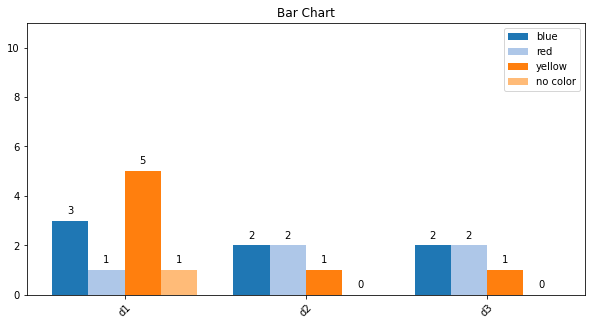

In [16]:
_, ax = plt.subplots(figsize=(10, 5))

render_bar(ax, df_div)

plt.show()